<a href="https://colab.research.google.com/github/Vicente-VP/Telecom-X-Analise-de-Evasao-de-Clientes/blob/main/TelecomX_BR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracão

In [2]:
import pandas as pd
df = pd.read_json('TelecomX_Data.json')
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [4]:
df.isnull().sum()
customer_df = df['phone'].apply(pd.Series)
print(customer_df.isnull().sum())

PhoneService     0
MultipleLines    0
dtype: int64


In [5]:
df['combined'] = df.apply(lambda row: (
    row['Churn'],
    tuple(sorted(row['customer'].items())),
    tuple(sorted(row['phone'].items())),
    tuple(sorted(row['internet'].items())),
    tuple(sorted(row['account'].items()))
), axis=1)

duplicatas = df[df.duplicated('combined', keep=False)]
print(duplicatas)

      customerID Churn                                           customer  \
218   0328-GRPMV   Yes  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
295   0426-TIRNE   Yes  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
473   0673-IGUQO    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
624   0887-HJGAR   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
685   0970-QXPXW    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
701   1000-AJSLD   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
745   1066-JKSGK   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
881   1240-KNSEZ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
1341  1934-SJVJK   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
1357  1963-SVUCV   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
1841  2619-WFQWU   Yes  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1851  2636-ALXXZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

#🔧 Transformação

In [6]:
df['combined'] = df.apply(lambda row: (
    row['Churn'],
    tuple(sorted(row['customer'].items())),
    tuple(sorted(row['phone'].items())),
    tuple(sorted(row['internet'].items())),
    tuple(sorted(row['account'].items()))
), axis=1)

df_clean = df.drop_duplicates(subset='combined').drop(columns='combined')

df_clean.reset_index(drop=True, inplace=True)

In [7]:
df_clean['account'][0]['Charges']['Monthly']

65.6

In [8]:
df_clean['Contas_Diarias'] = df_clean['account'].apply(lambda d: d['Charges']['Monthly'] / 30)
df_clean.head()

,customerID,Churn,customer,phone,internet,account,Contas_Diarias
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '...",2.186667
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli...",1.996667
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",2.463333
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",3.266667
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",2.796667


In [9]:
df_clean.dropna(subset=['Churn'], axis=0, inplace=True)

In [10]:
dic = {'chave': 2}
type(dic)

dict

In [11]:
# for col in df_clean.columns:
#     for i in df_clean[col]:
#       if type(i) == dict:
#         for key, value in i.items():
#           if value == 'Yes':
#             print(df_clean[col])

for col in df_clean.columns:
    for idx, item in enumerate(df_clean[col]):
        if isinstance(item, dict):
            # Criar novo dicionário com valores substituídos
            updated_dict = {k: 1 if v == 'Yes' else 0 if v == 'No' else v for k, v in item.items()}
            df_clean.at[idx, col] = updated_dict

In [12]:
df_clean.head()

,customerID,Churn,customer,phone,internet,account,Contas_Diarias
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 1, 'MultipleLines': 0}","{'InternetService': 'DSL', 'OnlineSecurity': 0...","{'Contract': 'One year', 'PaperlessBilling': 1...",2.186667
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 1, 'MultipleLines': 1}","{'InternetService': 'DSL', 'OnlineSecurity': 0...","{'Contract': 'Month-to-month', 'PaperlessBilli...",1.996667
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 1, 'MultipleLines': 0}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",2.463333
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 1, 'MultipleLines': 0}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",3.266667
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 1, 'MultipleLines': 0}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",2.796667


#📊 Carga e análise

In [13]:
df_clean.describe()

,Contas_Diarias
count,7245.000000
mean,2.160246
std,1.003648
min,0.608333
25%,1.185000
50%,2.345000
75%,2.996667
max,3.958333


In [14]:
for i in df_clean.index:
  if df_clean.loc[i, 'Churn'] == '':
    df_clean.drop(i, inplace=True)


In [15]:
evasao = df_clean['Churn'].value_counts()

dict_evasao ={
    'Abandonou': evasao.index,
    'Num': evasao.values
}


df_evasao = pd.DataFrame(dict_evasao)

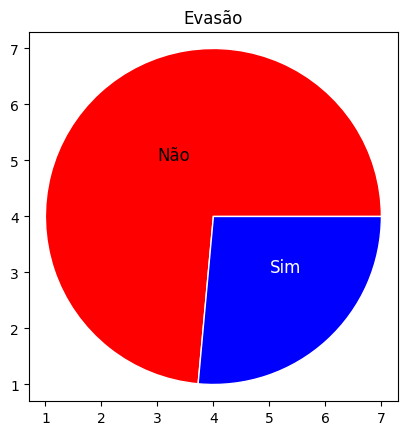

In [16]:
import matplotlib.pyplot as plt
color = ['Red', 'Blue']

fig, ax = plt.subplots()
plt.text(3,5, 'Não', fontsize = 12)
plt.text(5,3, 'Sim', fontsize = 12, color='w')
ax.pie(df_evasao['Num'], colors=color, radius=3, center=(4, 4),
       wedgeprops={"linewidth": 1, "edgecolor": "white"}, frame=True)
ax.set(title="Evasão")

plt.show()

In [17]:
df_clean['gender'] = df_clean['customer'].apply(
    lambda x: x['gender'] if isinstance(x, dict) and 'gender' in x else None
)

In [18]:
grouped = df_clean.groupby(['gender', 'Churn']).size().unstack(fill_value=0)

<Axes: xlabel='gender'>

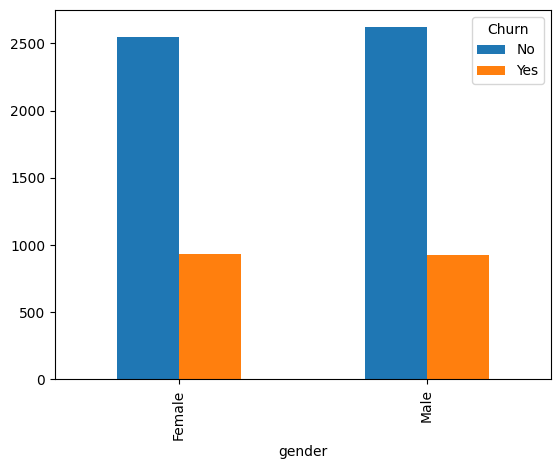

In [19]:
colors = ['#1f77b4', '#ff7f0e']  # azul e laranja

# Plotagem
grouped.plot(kind='bar', color=colors)

In [20]:
df_clean['Contrato'] = df_clean['account'].apply(
    lambda x: x['Contract'] if isinstance(x, dict) and 'Contract' in x else None
)

<Axes: xlabel='Contrato'>

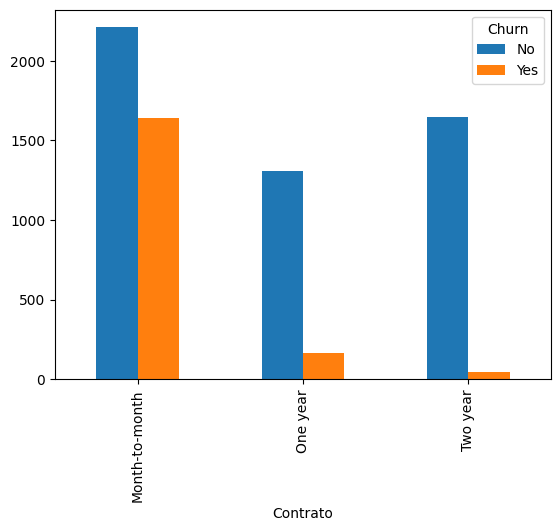

In [21]:
df_contract = df_clean.groupby(['Contrato', 'Churn']).size().unstack(fill_value=0)

df_contract.plot(kind='bar', color=colors)

In [27]:
df_clean['PaymentMethod'] = df_clean['account'].apply(
    lambda x: x['PaymentMethod'] if isinstance(x, dict) and 'PaymentMethod' in x else None
)

<Axes: xlabel='PaymentMethod'>

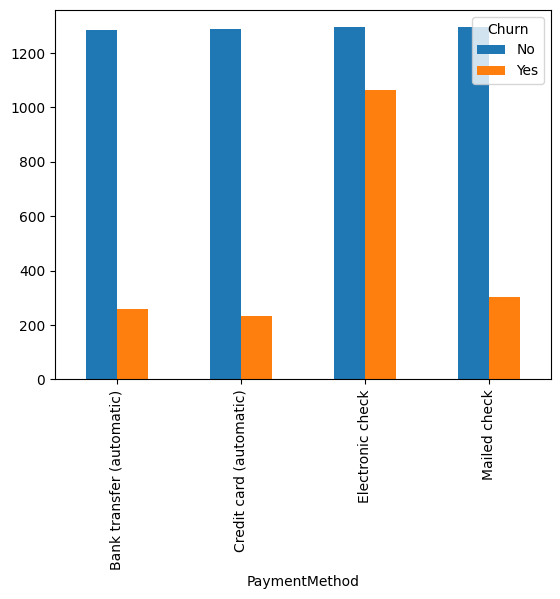

In [32]:
df_metPag = df_clean.groupby(['PaymentMethod', 'Churn']).size().unstack(fill_value=0)
df_metPag.plot(kind='bar', color=colors)

#📄Relatorio Final

## Introdução:
O principal objetivo da nossa analise é **determinar** possíveis motivos para os clientes do Telecom acabarem **saindo** do nosso serviço. Uma das suposições é aqueles clientes que contratam nossos serviços por tempos reduzidos, ou seja, contratam a gente apenas por alguns meses e não fecham um contrato mais longo. Já a segunda vimos que os clientes que pagam o seviço usando check eletronico acabam saindo mais dos nossos serviços.  

## Limpeza e Tratamento de Dados:
Comecei carregando o arquivo dentro do collab em vez de criar uma variável com a url do dataset, pois acho mais prático, após isso atribui os dados a uma variável.
Comecei análisando o dataset e percebi que todas as informações estavam com o tipo object, já que a grande marioria possuia um dicionário dentro delas dificultando um pouco nossa análise.
Verifiquei se havia algum dado repetido e aparentemente não havia, mas após tentar verificar cada dicionário foi percebido que havia sim algumas linhas repetidas e a melhor decisão foi exclui-las. (Depois percebi que tinham linhas inconsistentes, já que na coluna os únicos valores que poderiam existir é "Yes" e "No", mas no final das contas existiam strings vazias que foram excluídas posteriormente).
Em penúltimo criei uma coluna pra entendermos o gasto diário do cliente usando os dados de gasto mensal do cliente.
Por último padronizei os valores que tinham valor de "Yes" e "No" para 1 ou 0 (Menos na coluna Churn)

## Análise Exploratória de Dados:
Foram realizadas 5 análises, sendo elas:
 - Verificação de média, mediana e desvio padrão
 - Quantidade de Evasão através de um gráfico de pizza
 - Relação entre o gênero e a quantidade de evasão utilizando gráfico de barras
 - Relação entre o tipo do contrato e a quantidade de evasão utilizando gráfico de barras
 - Relação entre o método de pagamento e a quantidade de evasão utilizando gráfico de barras  

## Conclusões e Insights:
Após a análise dos gráficos realizados chegamos a conclusão que os clientes que utilizam método de pagamento que não é automático acaba cancelando mais o nosso serviço, um outro ponto também são os clientes que contratam nosso serviço por um período curto de tempo.

## Recomendações:
Portanto algumas possíveis ideias para resolvermos esse problema seria ou adicionarmos algum tipo de recompensa para pessoas que utilizam métodos de pagamentos automáticos, impulsionando pessoas a migrarem. Outra ideia seria talvez retirar outros métodos de pagamentos, mas isso nos faria perder alguns clientes.
Já na parte do tipo do contrato poderemos dar algum tipo de desconto pra pessoa contratar nosso serviço anual ou por 2 anos.